# Recta de regresión lineal

https://en.wikipedia.org/wiki/Sample_mean_and_covariance

Recta regresión lineal:  $ y - \bar{y} = \frac{s_{xy}}{s_{x}^2}(x-\bar{x}) $

Varianza muestral: $ s_{x}^2 = \frac{ \sum{(x_i-\bar{x})^2} }{ N-1 } $

Covarianza muestral: $ s_{xy} = \frac{ \sum{(x_i-\bar{x})(y_i-\bar{y})} }{ N-1 } $

**Grados de libertad:** La razón de usar N-1 en lugar de N en estas fórmulas, es que la media de la poblacion $E(X)$ es desconocida, y al reemplazarla por la media de la muestra $\bar{X}$ se "pierde un grado de libertad" (Pensar caso extremo en que N=1. Si solo tenemos un elemento, la media $\bar{X}$ va a ser él mismo, y su distancia a la media va a ser 0 mientras que la distancia a $E(X)$ (media de la poblacion, desconocida) probablemente no lo sea. Al usar $\bar{X}$ estamos "sumando una distancia menos". De manera general, $\bar{X}$ va a estar perfectamente centrada en nuestros datos, por lo que las distancias cuadráticas hasta ella son menores que hasta $E(X)$, que no está perfectamente centrada.



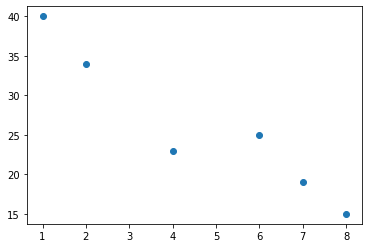

In [2]:
import numpy as np 
import pylab as plt

X = [8,7,6,4,2,1]
Y = [15,19,25,23,34,40]

plt.scatter(X, Y)

# Covarianza entre dos variables 

Covarianza muestral: $ s_{xy} = \frac{ \sum{(x_i-\bar{x})(y_i-\bar{y})} }{ N-1 } $


In [3]:
def covarianza(X, Y):
    assert len(X)==len(Y)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    return np.sum([(x-mean_X)*(y-mean_Y) for x,y in zip(X, Y)])/(len(X)-1)

covarianza(X,Y)

-25.0

# Matriz de covarianza


Si en lugar de 2 variables tenemos muchas más, se pueden calcular las covarianzas por parejas, para formar la matriz de covarianzas:

![Matriz de covarianza](img/covarianza.svg)

La diagonal contiene las varianzas de cada una de las variables.

In [3]:
# Calcular la matriz de covarianza de dos variables
print(X)
print(Y)
print(np.cov(X,Y))

print("\n----\n")

print(np.var(X, ddof=1)) # varianza, con 1 ddof
print(np.var(Y, ddof=1))

print("\n----\n")

# Tambien se puede calcular la covarianza de una matriz, con una fila por variable.
# Cada columna contiene una única observacion de esas variables
M = np.array(list(zip(X,Y))).T 
print(M)
print(np.cov(M))

[8, 7, 6, 4, 2, 1]
[15, 19, 25, 23, 34, 40]
[[  7.86666667 -25.        ]
 [-25.          88.        ]]

----

7.866666666666665
88.0

----

[[ 8  7  6  4  2  1]
 [15 19 25 23 34 40]]
[[  7.86666667 -25.        ]
 [-25.          88.        ]]


# Recta regresión 

Recta regresión lineal:  $ y = \frac{s_{xy}}{s_{x}^2}(x-\bar{x}) + \bar{y} $


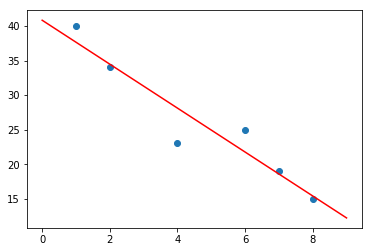

In [4]:

def build_regression(X, Y):
    Y_mean = np.mean(Y)
    X_mean = np.mean(X)

    covar_xy = np.cov(X,Y)[0][1] 
    var_x = np.var(X,ddof=1)
    
    covar_var = covar_xy/var_x
    
    return lambda x: covar_var*(x-X_mean)+Y_mean

regression = build_regression(X,Y)

XX = range(10)
YY = [regression(x) for x in XX]

plt.plot(XX, YY, color='red')
plt.scatter(X, Y)
